# Zhang 2021 Preprocessing

In [16]:
import pertpy as pt
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
adata = pt.dt.zhang_2021()
adata

AnnData object with n_obs × n_vars = 489490 × 27085
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster'

In [3]:
adata.obs

,Sample,Patient,Origin,Tissue,Efficacy,Group,Treatment,Number of counts,Number of genes,Major celltype,Cluster
Cell barcode,,,,,,,,,,,
AAACCTGAGGTTACCT.Pre_P007_b,Pre_P007_b,P007,b,blood,PR,Pre-treatment,Anti-PD-L1+Chemo,"1,769",818,ILC cell,b_ILC1-HSPA8
AAACCTGCAAAGGAAG.Pre_P007_b,Pre_P007_b,P007,b,blood,PR,Pre-treatment,Anti-PD-L1+Chemo,"3,037",892,T cell,b_CD4_Tem-GZMK
AAACCTGCAAGTCTAC.Pre_P007_b,Pre_P007_b,P007,b,blood,PR,Pre-treatment,Anti-PD-L1+Chemo,"1,117",597,T cell,b_CD4_Tem-GZMK
AAACCTGCAATAAGCA.Pre_P007_b,Pre_P007_b,P007,b,blood,PR,Pre-treatment,Anti-PD-L1+Chemo,"1,750",757,T cell,b_CD4_Tcm-TCF7
AAACCTGCACAGCGTC.Pre_P007_b,Pre_P007_b,P007,b,blood,PR,Pre-treatment,Anti-PD-L1+Chemo,652,470,T cell,b_CD8_Teff-GNLY
...,...,...,...,...,...,...,...,...,...,...,...
TGGTTAGTCACTCTTA.Pre_P004_t,Pre_P004_t,P004,t,chest_wall,SD,Pre-treatment,Anti-PD-L1+Chemo,"3,440","1,439",ILC cell,t_ILC2-SPON2
TGTTCCGTCTAACGGT.Pre_P004_t,Pre_P004_t,P004,t,chest_wall,SD,Pre-treatment,Anti-PD-L1+Chemo,"3,854","1,449",ILC cell,t_ILC3-AREG
TTCGAAGCAATCCAAC.Pre_P004_t,Pre_P004_t,P004,t,chest_wall,SD,Pre-treatment,Anti-PD-L1+Chemo,"9,030","2,961",ILC cell,t_ILC3-AREG


## Only treatment tumor samples

In [4]:
adata = adata[adata.obs['Origin']=="t" ,:].copy()

In [5]:
# We'll filter this again for DIALOGUE but keep all samples for now
# adata = adata[adata.obs['Sample'].str.contains('Pre'),:].copy()

## Preprocessing like TG

https://github.com/tessadgreen/ThesisCode/blob/main/Chapter3/drug_response/import_zhang_data.ipynb

In [6]:
sc.pp.filter_genes(adata, min_cells=10)

In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [8]:
sc.pp.log1p(adata)

In [9]:
sc.pp.highly_variable_genes(adata, n_top_genes=4000, flavor = "seurat_v3")

/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:72: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [10]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

In [11]:
sc.pp.scale(adata, max_value=10)

/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:961: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [12]:
sc.tl.pca(adata, svd_solver='arpack')

In [18]:
isecs = pd.crosstab(adata.obs['Cluster'], adata.obs['Sample'])
celltypes = isecs[(isecs > 3).sum(axis=1) >= np.shape(isecs)[1]-2].index.values.tolist()


In [19]:
adata = adata[adata.obs['Cluster'].isin(celltypes),:].copy()

In [20]:
adata

AnnData object with n_obs × n_vars = 44636 × 4000
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [21]:
isecs = pd.crosstab(adata.obs['Cluster'], adata.obs['Sample'])

In [22]:
keep_pts = isecs.loc[:,(isecs > 3).sum(axis=0) == isecs.shape[0]].columns.values.tolist()

In [23]:
adata = adata[adata.obs['Sample'].isin(keep_pts),:].copy()

In [24]:
pd.crosstab(adata.obs['Cluster'], adata.obs['Sample']).min(axis=1)

Cluster
t_Bmem-CD27         11
t_CD4_Tcm-LMNA      77
t_CD4_Treg-FOXP3    62
t_CD8_MAIT-KLRB1    11
t_CD8_Tem-GZMK      72
t_CD8_Trm-ZNF683    71
t_Tn-LEF1           50
t_mono-FCN1         11
t_pB-IGHG1           8
dtype: int64

In [25]:
adata

AnnData object with n_obs × n_vars = 42550 × 4000
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [26]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [27]:
adata_plot = sc.pp.subsample(adata,  n_obs=10000, random_state=0, copy=True)

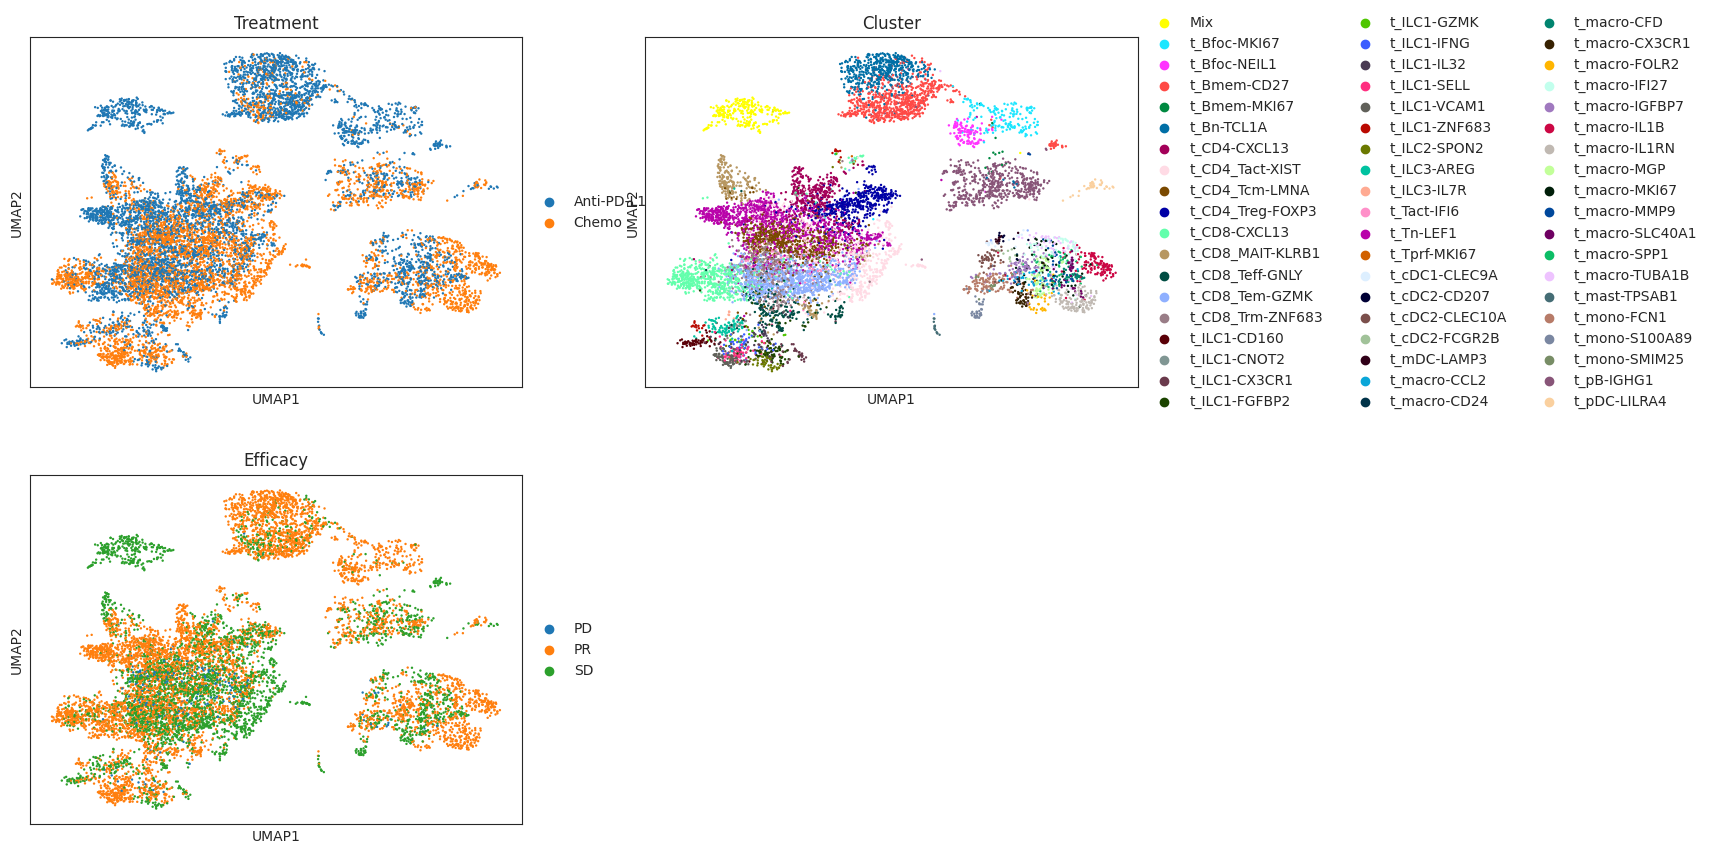

In [29]:
sc.pl.umap(
    adata_plot,
    color=[
        "Treatment",
        "Cluster",
        "Efficacy"
    ],
    ncols=2
)

In [30]:
adata.write("zhang_preprocessed.h5ad")